In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Importing data
X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape=  (331, 10)
y_train.shape=  (331,)


In [4]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train)

print("Ridge Regression:\n")
print("R² Train Score =", ridge_reg.score(X_train_scaled, y_train))
print("R² Test Score =", ridge_reg.score(X_test_scaled, y_test))
print("Intercept (b):", ridge_reg.intercept_)
print("w =", ridge_reg.coef_)

Ridge Regression:

R² Train Score = 0.5389012620330784
R² Test Score = 0.42512030341854057
Intercept (b): 149.619335347432
w = [  0.24211311 -10.29780123  25.46062003  13.49834302 -26.33676167
  13.93572477   3.86882969   9.60743482  33.47150149   2.97862494]


In [5]:
# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)

print("Lasso Regression:\n")
print("R² Train Score =", lasso_reg.score(X_train_scaled, y_train))
print("R² Test Score =", lasso_reg.score(X_test_scaled, y_test))
print("Intercept (b):", lasso_reg.intercept_)
print("w =", lasso_reg.coef_)


Lasso Regression:

R² Train Score = 0.5347772991751583
R² Test Score = 0.41305696325496966
Intercept (b): 149.619335347432
w = [ 0.         -8.34824185 25.78820464 12.16576643 -3.02776066 -0.
 -8.30545786  0.96191687 25.79375225  2.03642487]


In [6]:
# Polynomial Regression (without regularization)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_linreg = LinearRegression()
poly_linreg.fit(X_train_poly, y_train)

print("Polynomial Regression:\n")
print("R² Train Score =", poly_linreg.score(X_train_poly, y_train))
print("R² Test Score =", poly_linreg.score(X_test_poly, y_test))
print("Intercept (b):", poly_linreg.intercept_)
print("w =", poly_linreg.coef_)

Polynomial Regression:

R² Train Score = 0.6235477121925127
R² Test Score = 0.32424917682316023
Intercept (b): 53.090133142770526
w = [ 2.44811190e+00 -1.01093225e+01  2.05624738e+01  1.42175788e+01
 -8.55458622e+02  7.50347429e+02  3.13057331e+02  3.07907919e+00
  3.22167984e+02  1.94892189e+00  9.43375498e-01  9.40569618e+00
  3.35827100e+00 -5.83826917e+00  5.46738879e-03 -8.87831221e+00
  1.03206629e+01  1.33288847e+01  1.36154374e+00  6.09750465e+00
  6.10837983e-02  1.34067101e-01  9.88154848e+00  2.04561405e+01
 -2.03395218e+01 -1.17108189e+01 -3.30086644e+00 -1.07450961e+01
 -2.28507754e+00  3.68608317e+00  4.75973679e+00 -4.32198787e+01
  3.73034169e+01  1.91733750e+01  3.57325450e+00  1.77516491e+01
 -4.71839084e+00  2.56691344e+00  2.65673286e+01 -2.05568894e+01
 -1.12515027e+01 -8.43076615e+00 -4.90762223e+00 -3.55499671e+00
  1.03291632e+02 -1.10778441e+02 -1.32620155e+02 -6.60393731e+01
  2.83025660e+01 -1.36410308e+01  2.91146388e+01  7.63411441e+01
  2.93701571e+01 -3.9

In [7]:
# Polynomial + Ridge Regression
poly_ridge = Ridge()
poly_ridge.fit(X_train_poly, y_train)

print("Polynomial + Ridge:\n")
print("R² Train Score =", poly_ridge.score(X_train_poly, y_train))
print("R² Test Score =", poly_ridge.score(X_test_poly, y_test))
print("Intercept (b):", poly_ridge.intercept_)
print("w =", poly_ridge.coef_)

Polynomial + Ridge:

R² Train Score = 0.6211038024034929
R² Test Score = 0.3271300251661279
Intercept (b): 134.63639858089948
w = [  2.28711658  -9.58760979  20.51633069  13.81956955  -1.48095897
  -2.57866201  -7.59435771   3.91893502  31.18686649   2.08723546
   1.24075927  10.39733549   2.96303561  -5.16373276  -1.63465354
  -7.2925297   11.40423088  13.50710805   0.93519537   5.78644833
   0.05793144   0.80064547   9.59868282  11.69544223 -13.46743852
  -7.31931873  -1.77255084  -8.87490564  -2.68319414   4.16936512
   5.11956187 -29.66962614  25.50273631  12.333462     2.70252326
   9.73369517  -4.02668304   2.33638076   7.9451893   -5.37548177
  -2.55162465  -6.63237731   1.92887561  -3.85983908   7.22582857
  11.10626264  -8.40837362 -12.05694565 -19.23885428  -8.35865103
  -7.53972702  -8.85416783  -7.96356698  19.60121496   0.36913302
  -4.27041488  -4.57872789   2.11685404  11.31056248   5.88802975
 -14.35986856   9.79505233   8.90379072   7.06635832   3.90085589]


In [8]:
# Polynomial + Lasso Regression
poly_lasso = Lasso()
poly_lasso.fit(X_train_poly, y_train)

print("Polynomial + Lasso:\n")
print("R² Train Score =", poly_lasso.score(X_train_poly, y_train))
print("R² Test Score =", poly_lasso.score(X_test_poly, y_test))
print("Intercept (b):", poly_lasso.intercept_)
print("w =", poly_lasso.coef_)

Polynomial + Lasso:

R² Train Score = 0.59544511303787
R² Test Score = 0.38098189825658824
Intercept (b): 136.75067682160685
w = [ 1.90792036e+00 -7.24543742e+00  2.21492466e+01  1.19916399e+01
 -0.00000000e+00 -0.00000000e+00 -8.80516572e+00  0.00000000e+00
  2.71565957e+01  2.23185561e+00  2.66186802e-01  9.14655413e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.39826854e+00  2.96568392e+00
  0.00000000e+00  0.00000000e+00  5.98262070e+00 -0.00000000e+00
 -4.31498629e+00  0.00000000e+00 -0.00000000e+00 -1.13067792e+00
 -2.66084339e+00  4.12512918e+00  4.84406898e+00 -4.81056717e-04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.94354081e-01  2.23074730e-01 -0.00000000e+00 -0.00000000e+00
  1.21842406e+00 -2.63049992e+00  2.78721822e+00 -3.61974706e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.98957867e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.75306654e-01
  0.00000000e+00  5.915964

In [9]:
# Create the summary DataFrame
summary_df = pd.DataFrame({
    "Model": [
        "Ridge Regression",
        "Lasso Regression",
        "Polynomial Regression",
        "Polynomial + Ridge",
        "Polynomial + Lasso"
    ],
    "R² Train Score": [
        ridge_reg.score(X_train_scaled, y_train),
        lasso_reg.score(X_train_scaled, y_train),
        poly_linreg.score(X_train_poly, y_train),
        poly_ridge.score(X_train_poly, y_train),
        poly_lasso.score(X_train_poly, y_train),
    ],
    "R² Test Score": [
        ridge_reg.score(X_test_scaled, y_test),
        lasso_reg.score(X_test_scaled, y_test),
        poly_linreg.score(X_test_poly, y_test),
        poly_ridge.score(X_test_poly, y_test),
        poly_lasso.score(X_test_poly, y_test),
    ],
    "Comment": [
        "Baseline model with regularization, decent bias-variance tradeoff.",
        "Similar to Ridge but zeroes out some coefficients — sign of sparsity.",
        "Overfitting: high R² on train, poor on test.",
        "Slightly reduced overfitting, but not better than the baseline.",
        "Best generalization among polynomial models."
    ]
})

# Display the summary
print("Summary of Regression Models:\n")
display(summary_df.round(4))

Summary of Regression Models:



,Model,R² Train Score,R² Test Score,Comment
0,Ridge Regression,0.5389,0.4251,"Baseline model with regularization, decent bia..."
1,Lasso Regression,0.5348,0.4131,Similar to Ridge but zeroes out some coefficie...
2,Polynomial Regression,0.6235,0.3242,"Overfitting: high R² on train, poor on test."
3,Polynomial + Ridge,0.6211,0.3271,"Slightly reduced overfitting, but not better t..."
4,Polynomial + Lasso,0.5954,0.3810,Best generalization among polynomial models.


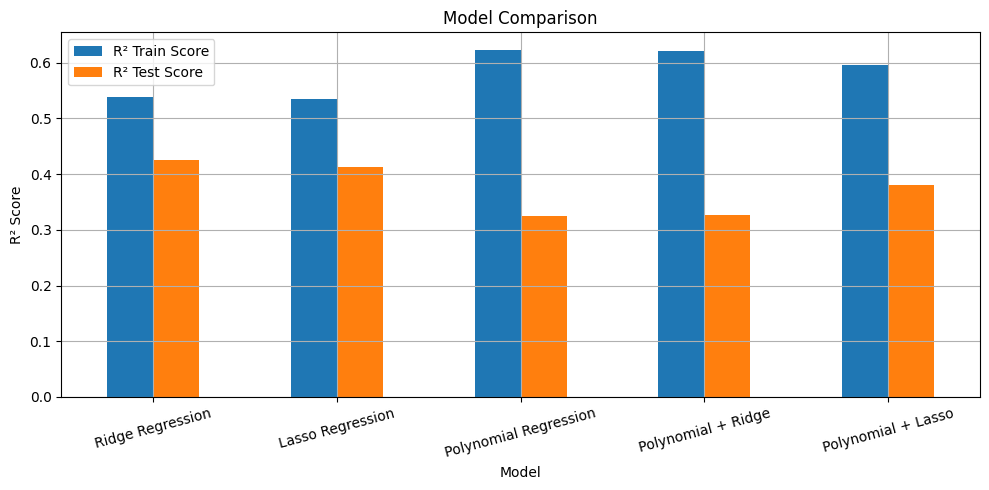

In [10]:
summary_df.plot(x="Model", y=["R² Train Score", "R² Test Score"], kind="bar", figsize=(10,5), title="Model Comparison")
plt.ylabel("R² Score")
plt.grid(True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()